In [7]:
%load_ext autoreload
%autoreload 2
import os
from datetime import datetime
import fire
import torch
import pandas as pd
from torchtext import data
import torch.nn as nn
from transformers import (
    AdamW, BertForSequenceClassification, BertTokenizer,
    get_constant_schedule_with_warmup
)

from offenseval.nn import (
    Tokenizer,
    train, evaluate, train_cycle, save_model, load_model, evaluate_dataset
)
from offenseval.datasets import datasets
import glob

pd.options.display.max_rows = 200
pd.options.display.max_colwidth = 300

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


danish_models = glob.glob("../../models/*.da.*.pt")
mixed_models = glob.glob("../../models/*.olid+da.*.pt")
mixed_models = [m for m in mixed_models if "95" not in m]

mixed_models

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


['../../models/bert_cased.olid+da.25.pt',
 '../../models/bert_cased.olid+da.70.pt',
 '../../models/bert_cased.olid+da.85.pt',
 '../../models/bert_cased.olid+da.65.pt',
 '../../models/bert_cased.olid+da.5.pt',
 '../../models/bert_cased.olid+da.90.pt',
 '../../models/bert_cased.olid+da.80.pt',
 '../../models/bert_cased.olid+da.15.pt',
 '../../models/bert_cased.olid+da.30.pt',
 '../../models/bert_cased.olid+da.20.pt',
 '../../models/bert_cased.olid+da.10.pt',
 '../../models/bert_cased.olid+da.55.pt',
 '../../models/bert_cased.olid+da.50.pt',
 '../../models/bert_cased.olid+da.45.pt',
 '../../models/bert_cased.olid+da.60.pt',
 '../../models/bert_cased.olid+da.35.pt',
 '../../models/bert_cased.olid+da.75.pt',
 '../../models/bert_cased.olid+da.40.pt']

In [8]:
%%capture
import glob 
import os

danish_only = {}
mixed = {}

for path in danish_models:
    _, file = os.path.split(path)
    model_name, _ = os.path.splitext(file)
    percentage = int(model_name.split(".")[-1])
    
    model, TEXT = load_model(path, device)
    model.eval();
    
      
    report = evaluate_dataset(
        model, TEXT, datasets["danish"]["test"],
    )
    
    danish_only[percentage] = report.macro_f1
    

for path in mixed_models:
    _, file = os.path.split(path)
    model_name, _ = os.path.splitext(file)
    percentage = int(model_name.split(".")[-1])
    
    model, TEXT = load_model(path, device)
    model.eval();
    
      
    report = evaluate_dataset(
        model, TEXT, datasets["danish"]["test"],
    )
    
    mixed[percentage] = report.macro_f1


Text(0, 0.5, 'Macro-F1')

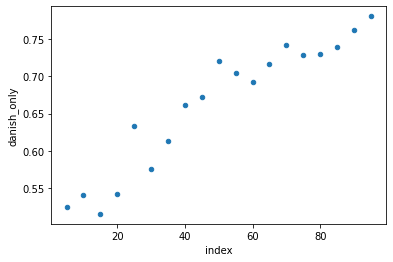

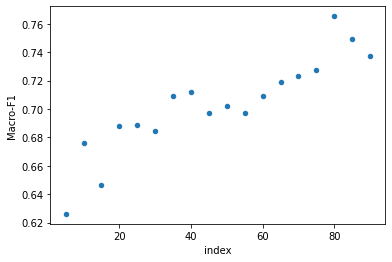

In [10]:
import matplotlib.pyplot as plt
series = pd.Series(danish_only)

df = pd.DataFrame({
    "danish_only": series,
    "mixed": mixed
})

df.reset_index().plot(kind="scatter", y="danish_only", x="index")
df.reset_index().plot(kind="scatter", y="mixed", x="index")

plt.ylabel("Macro-F1")

Text(0.5, 0, 'Percentage of Danish dataset')

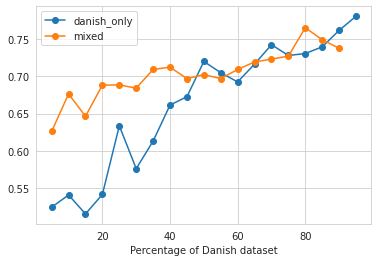

In [18]:
import seaborn as sns

sns.set_style('whitegrid')

df.plot(style="-o")

plt.xlabel("Percentage of Danish dataset")

In [1]:
!nvidia-smi

Fri May 15 11:05:18 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.87.01    Driver Version: 418.87.01    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:17:00.0 Off |                  N/A |
| 65%   86C    P2   186W / 250W |   7663MiB / 11178MiB |     96%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:65:00.0 Off |                  N/A |
| 44%   74C    P2   249W / 250W |   7551MiB / 11178MiB |     94%      Default |
+-------------------------------+----------------------+----------------------+
        